<h1>따릉이 주행거리 추천시스템<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-다운로드" data-toc-modified-id="데이터-다운로드-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 다운로드</a></span></li><li><span><a href="#데이터-부르기" data-toc-modified-id="데이터-부르기-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>데이터 부르기</a></span></li><li><span><a href="#데이터-전처리" data-toc-modified-id="데이터-전처리-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>데이터 전처리</a></span></li><li><span><a href="#데이터-로더" data-toc-modified-id="데이터-로더-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>데이터 로더</a></span></li><li><span><a href="#간단한-MLP-모델" data-toc-modified-id="간단한-MLP-모델-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>간단한 MLP 모델</a></span></li></ul></div>

# 데이터 다운로드

https://drive.google.com/file/d/1wjnM_E5I0l4P-dNlV7fBNzPEg6RZ_eeM/view?usp=sharing #weather_df.csv
https://drive.google.com/file/d/1LEH7k18Lh53iJisT84at7Os9HgIR4GsK/view?usp=sharing #bike_df.csv
https://drive.google.com/file/d/1UoevNRadJNANWxuH40YAuPktNnMPzY8b/view?usp=sharing #air_df.csv


# 데이터 부르기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 한글 출력 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


In [2]:
# 기간 : 2018년 12월 1일 ~ 2019년 11월 30일
# 기간 내 날씨

weather_df = pd.read_csv('weather_df.csv')
weather_df.drop(['지점','지점명'],axis=1,inplace=True)
weather_df.fillna('0',inplace=True)
weather_df.head()

,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
0,2018-12-01 00:00:00,1.8,0,0.9,47.0,1016.5,0,0,0,2,-0.4
1,2018-12-01 01:00:00,1.9,0,0.4,53.0,1016.1,0,0,0,8,-0.6
2,2018-12-01 02:00:00,1.5,0,1,55.0,1016.1,0,0,0,7,-0.5
3,2018-12-01 03:00:00,1.2,0,0.8,48.0,1016.4,0,0,0,2,-0.7
4,2018-12-01 04:00:00,0.9,0,1.2,54.0,1015.8,0,0,0,1,-0.7


In [3]:
# 기간 내 미세먼지농도

air_df = pd.read_csv('air_df.csv') 
air_df.drop(['지점명','지점번호'],axis=1,inplace=True)
air_df.fillna('0',inplace=True)
air_df.head()

,일시,미세먼지농도(㎍/㎥)
0,2018-12-01 00:00:00,41
1,2018-12-01 01:00:00,46
2,2018-12-01 02:00:00,29
3,2018-12-01 03:00:00,31
4,2018-12-01 04:00:00,39


In [4]:
# 기간 내 따릉이 대여정보

bike_df = pd.read_csv('bike_df.csv', skiprows = lambda i: i%2==0 and i!=0) # 절반만 가져오기
bike_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6,7,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,일시,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여소ID
0,2018-12-01 00:00:00,1721. 창동역 2번출구,정기권,Null,~10대,1,25.95,0.26,1130.0,4,1721
1,2018-12-01 00:00:00,311. 서울광장 옆,정기권,M,40대,1,90.59,0.71,3050.0,32,311
2,2018-12-01 00:00:00,1671. 인덕대학교,정기권,M,40대,1,30.78,0.27,1160.0,13,1671
3,2018-12-01 00:00:00,274. 영등포역지하쇼핑센타 5번출구,정기권,M,40대,1,89.83,0.81,3490.0,45,274
4,2018-12-01 00:00:00,3520. 광진경찰서,정기권,M,40대,1,0.29,0,10.0,3,3520


# 데이터 전처리

In [5]:
# 기간 내 날씨 + 미세먼지농도

new_weather_df = pd.merge(weather_df,air_df[['일시','미세먼지농도(㎍/㎥)']],on='일시')
new_weather_df.head()

,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C),미세먼지농도(㎍/㎥)
0,2018-12-01 00:00:00,1.8,0,0.9,47.0,1016.5,0,0,0,2,-0.4,41
1,2018-12-01 01:00:00,1.9,0,0.4,53.0,1016.1,0,0,0,8,-0.6,46
2,2018-12-01 02:00:00,1.5,0,1,55.0,1016.1,0,0,0,7,-0.5,29
3,2018-12-01 03:00:00,1.2,0,0.8,48.0,1016.4,0,0,0,2,-0.7,31
4,2018-12-01 04:00:00,0.9,0,1.2,54.0,1015.8,0,0,0,1,-0.7,39


In [6]:
# (기간 내 날씨 + 미세먼지농도) + 따릉이 대여정보

data_df = pd.merge(bike_df,new_weather_df,on='일시')
data_df.head()

,일시,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,...,강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C),미세먼지농도(㎍/㎥)
0,2018-12-01 00:00:00,1721. 창동역 2번출구,정기권,Null,~10대,1,25.95,0.26,1130.0,4,...,0,0.9,47.0,1016.5,0,0,0,2,-0.4,41
1,2018-12-01 00:00:00,311. 서울광장 옆,정기권,M,40대,1,90.59,0.71,3050.0,32,...,0,0.9,47.0,1016.5,0,0,0,2,-0.4,41
2,2018-12-01 00:00:00,1671. 인덕대학교,정기권,M,40대,1,30.78,0.27,1160.0,13,...,0,0.9,47.0,1016.5,0,0,0,2,-0.4,41
3,2018-12-01 00:00:00,274. 영등포역지하쇼핑센타 5번출구,정기권,M,40대,1,89.83,0.81,3490.0,45,...,0,0.9,47.0,1016.5,0,0,0,2,-0.4,41
4,2018-12-01 00:00:00,3520. 광진경찰서,정기권,M,40대,1,0.29,0,10.0,3,...,0,0.9,47.0,1016.5,0,0,0,2,-0.4,41


In [7]:
# 성별, 연령대, 날씨로 이동거리를 예측하자

data_df = data_df.drop(columns=['일시','대여소명','이용건수','대여구분코드','운동량','탄소량','사용시간','대여소ID'])
data_df.head()

,성별,연령대코드,이동거리,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C),미세먼지농도(㎍/㎥)
0,Null,~10대,1130.0,1.8,0,0.9,47.0,1016.5,0,0,0,2,-0.4,41
1,M,40대,3050.0,1.8,0,0.9,47.0,1016.5,0,0,0,2,-0.4,41
2,M,40대,1160.0,1.8,0,0.9,47.0,1016.5,0,0,0,2,-0.4,41
3,M,40대,3490.0,1.8,0,0.9,47.0,1016.5,0,0,0,2,-0.4,41
4,M,40대,10.0,1.8,0,0.9,47.0,1016.5,0,0,0,2,-0.4,41


In [8]:
# 범주형 자료 (성별, 연령대코드) 를 양적 데이터로 만들기 (가변수 활용)

data_df = data_df.drop(['성별','연령대코드'],axis=1).join(pd.get_dummies(data_df[['성별','연령대코드']])).astype(float)
data_df.head()

,이동거리,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),...,성별_F,성별_M,성별_Null,연령대코드_20대,연령대코드_30대,연령대코드_40대,연령대코드_50대,연령대코드_60대,연령대코드_70대~,연령대코드_~10대
0,1130.0,1.8,0.0,0.9,47.0,1016.5,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3050.0,1.8,0.0,0.9,47.0,1016.5,0.0,0.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1160.0,1.8,0.0,0.9,47.0,1016.5,0.0,0.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3490.0,1.8,0.0,0.9,47.0,1016.5,0.0,0.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,10.0,1.8,0.0,0.9,47.0,1016.5,0.0,0.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
data_df.shape

(6454300, 22)

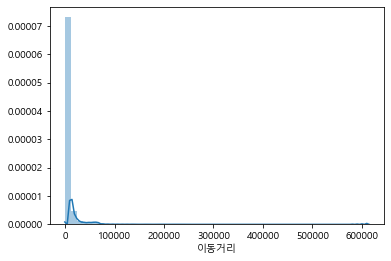

In [10]:
# 이동거리 분포 확인

import seaborn as sns
sns.distplot(data_df['이동거리'])

In [11]:
# IQR = Q3-Q1, Q1-1.5*IQR 보다 작거나, Q3+1.5*IQR보다 크면 이상치
x=data_df['이동거리'].values
q1 = np.percentile(x, 25)
q3 = np.percentile(x, 75)
iqr = q3-q1
print(q1-iqr*1.5)
print(q3+iqr*1.5)

-5260.0
12180.0


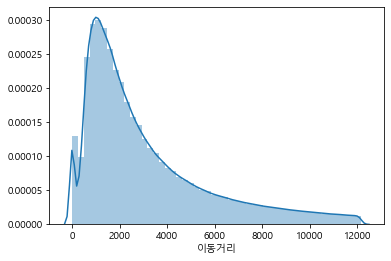

In [12]:
data_df = data_df[data_df['이동거리']<q3+iqr*1.5]
sns.distplot(data_df['이동거리'])

In [13]:
data_df.shape

(5780267, 22)

In [14]:
# 랜덤포레스트회귀로 분석해보기
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [15]:
x = data_df.drop(['이동거리'], axis=1)
y = data_df['이동거리']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42) 

In [16]:
forest = RandomForestRegressor(criterion='mse', random_state=42) 
forest.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [17]:
y_test_pred = forest.predict(x_test)

In [18]:
MSE_forest = mean_squared_error(y_test, y_test_pred)
print(f'MSE_forest : {MSE_forest}')

# f-string (Literal String Interpolation) 사용하자.
# ex)
# name = 'Jung'
# sex = 'male'

# f'Hi, I am {name}. I am {sex}.'
# >>> 'Hi, I am Jung. I am male'

MSE_forest : 6907865.827518065


In [19]:
# 특성중요도 찾기
feature_importance = forest.feature_importances_

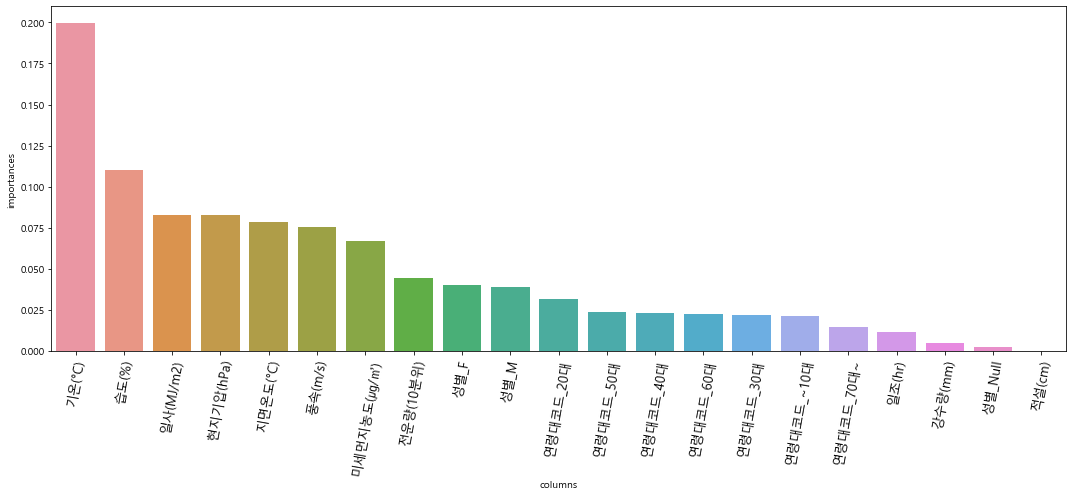

In [20]:
# plot
df_fi = pd.DataFrame({'columns':x.columns, 'importances':feature_importance})
df_fi = df_fi[df_fi['importances'] > 0] # importance가 0이상인 것만 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'])
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()

In [21]:
#특성 중요도가 높은 10개만 넣어보자
list1 = []
for i,v in enumerate(df_fi['columns'][0:10]):
    list1.append(v)
data_df = data_df[list1]
data_df.head()

,기온(°C),습도(%),일사(MJ/m2),현지기압(hPa),지면온도(°C),풍속(m/s),미세먼지농도(㎍/㎥),전운량(10분위),성별_F,성별_M
0,1.8,47.0,0.0,1016.5,-0.4,0.9,41.0,2.0,0.0,0.0
1,1.8,47.0,0.0,1016.5,-0.4,0.9,41.0,2.0,0.0,1.0
2,1.8,47.0,0.0,1016.5,-0.4,0.9,41.0,2.0,0.0,1.0
3,1.8,47.0,0.0,1016.5,-0.4,0.9,41.0,2.0,0.0,1.0
4,1.8,47.0,0.0,1016.5,-0.4,0.9,41.0,2.0,0.0,1.0


In [22]:
data_df.shape

(5780267, 10)

# 데이터 로더

In [23]:
import torch
from torch.utils.data import Dataset,DataLoader
from sklearn import preprocessing

In [24]:
class BikeDataLoader(Dataset):
    def __init__(self,transform = torch.tensor):
        x_data = data_df.values
        self.Y = y.values
        self.X = preprocessing.scale(x_data) 
        self.len = len(data_df)
        self.transform = transform
        
    def __getitem__(self,index):
        return self.transform(self.X[index]),self.transform(self.Y[index])
    
    def __len__(self):
        return self.len

In [25]:
dataset = BikeDataLoader()

In [26]:
dataset[0]

(tensor([-2.0165, -0.3917, -0.8067,  1.7158, -1.8389, -1.1574,  0.3721, -0.7578,
         -0.4763, -0.6809], dtype=torch.float64), tensor(1130.))

In [27]:
dataset.len

5780267

In [28]:
# train, validation set 나누기

train_val_ratio = 0.8
train_size = int(dataset.len*train_val_ratio)
val_size = dataset.len - train_size
print(train_size, val_size)

#datset를 train_size와 val_size의 길이로 나눈다
train_dataset,val_dataset = torch.utils.data.random_split(dataset,[train_size,val_size])
print(len(train_dataset), len(val_dataset))

4624213 1156054
4624213 1156054


In [29]:
batch_size = 4096 
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=True)

# 간단한 MLP 모델

In [30]:
from torch import nn
from torch.nn import functional as F
import torch.optim as optim

class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.layer1 = nn.Linear(10,20)
        self.layer2 = nn.Linear(20,20)
        self.layer3 = nn.Linear(20,20)
        self.layer4 = nn.Linear(20,1)
        
    def forward(self,x):
        x_origin = x.float()
        x = F.elu(self.layer1(x_origin))
        x = F.elu(self.layer2(x))
        x = F.elu(self.layer3(x))
        x = F.elu(self.layer4(x))
        return x.squeeze(-1)

In [31]:
model = Model().cuda()
criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

In [ ]:
plot_list = {'train':[], 'val':[]}

for epoch in range(50):
    model.train()
    train_losses = []
    for i, data in enumerate(train_loader): # i에는 인덱스 값이, data에는 [inputs과 targets] 이 있다.
        inputs, targets = data
        inputs, targets = inputs.cuda(), targets.cuda()
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        train_loss = criterion(outputs, targets)
        train_loss.backward()
        optimizer.step()
        
        train_losses.append(train_loss)
        
        del data
        del inputs
    
    model.eval()
    val_losses = []
    for i,data in enumerate(val_loader):
        inputs,targets = data
        inputs, targets = inputs.cuda(),targets.cuda()
            
        outputs = model(inputs)
        val_loss = criterion(outputs, targets)
        
        val_losses.append(val_loss.item())
    print(f"{epoch+1} epoch train loss = {sum(train_losses)/len(train_losses)}")    
    print(f"{epoch+1} epoch val loss = {sum(val_losses)/len(val_losses)}")
    print('-'*50)
    plot_list['train'].append(sum(train_losses)/len(train_losses))
    plot_list['val'].append(sum(val_losses)/len(val_losses))

print('Finished Training')

1 epoch train loss = 10571213.0
1 epoch val loss = 7064232.2597173145
--------------------------------------------------
2 epoch train loss = 6985648.5
2 epoch val loss = 6965880.689045937
--------------------------------------------------
3 epoch train loss = 6947292.0
3 epoch val loss = 6952782.019434629
--------------------------------------------------
4 epoch train loss = 6936038.5
4 epoch val loss = 6943330.348056537
--------------------------------------------------
5 epoch train loss = 6929454.0
5 epoch val loss = 6937787.187279152
--------------------------------------------------
6 epoch train loss = 6925662.0
6 epoch val loss = 6936273.443462897
--------------------------------------------------
7 epoch train loss = 6923141.0
7 epoch val loss = 6932452.754416961
--------------------------------------------------
8 epoch train loss = 6921592.0
8 epoch val loss = 6935751.749116608
--------------------------------------------------
9 epoch train loss = 6920471.0
9 epoch val los

In [ ]:
print(f'MSE_forest : {MSE_forest}')
print(f'MSE_MLP : {sum(val_losses)/len(val_losses)}')

In [ ]:
plt.plot(plot_list['train'])
plt.plot(plot_list['val'])
plt.legend(['train', 'val'])
plt.show()